# Cleaning of the bridge file with the final road file

In [1]:
# Import the needed libaries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import geopy.distance

## Load in all of the data

In [2]:
df_bridges = pd.read_excel('infrastructure/BMMS_overview.xlsx')

In [3]:
df_bridges

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.8,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702889,90.450389,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.704583,90.518833,road_precise
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.88,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699833,90.530722,bcs1
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699667,90.530722,bcs1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,Z8806,83.728,Box Culvert,LRP083a,.,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.6,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183889,90.302222,bcs1
21403,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,.,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.2,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.520056,90.311667,bcs1
21404,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.73,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,road_interpolate
21405,Z8910,28.880,RCC Girder Bridge,LRP028a,Narainpur Bridge,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.88,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.511694,90.534166,road_precise


File containing the geometry of Bangladesh <br>
https://cartographyvectors.com/map/858-bangladesh-detailed-boundary

In [4]:
bangladesh = gpd.read_file('infrastructure/bangladesh-detailed-boundary_858.geojson')
bangladesh.to_crs(epsg=4326, inplace=True)
bangladesh.head()

,NAME_LEN,NAME_FR,ISO_A3,ISO_A2,ABBREV_LEN,FIPS_10_,ECONOMY,ADM0_A3_US,NAME_NL,NAME_SORT,...,SU_DIF,featurecla,MIN_LABEL,NAME_ZH,WB_A2,WB_A3,NAME_KO,NE_ID,NAME_LONG,geometry
0,10,Bangladesh,BGD,BD,5,BG,7. Least developed region,BGD,Bangladesh,Bangladesh,...,0,Admin-0 country,3,孟加拉国,BD,BGD,방글라데시,1159320407,Bangladesh,"MULTIPOLYGON (((92.57588 21.97757, 92.59024 21..."


In [5]:
df_roads = pd.read_csv('infrastructure/final_roads.csv', delimiter=',', skipinitialspace = True, encoding = 'unicode_escape')
df_roads.head(5)

,road,LRP,lat,lon,type,len_prev,len_next,corrected,calculated_chainage
0,N1,LRPS,23.706028,90.443333,Start point,0.000000,0.007737,NaN,0.000000
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150,NaN,0.007737
2,N1,LRPSb,23.702778,90.450472,NaN,0.000150,0.001630,NaN,0.007886
3,N1,LRP001,23.702139,90.451972,NaN,0.001630,0.009603,NaN,0.009517
4,N1,LRP002,23.697889,90.460583,NaN,0.009603,0.001205,NaN,0.019120


In [6]:
df_roads.shape

(52210, 9)

## Exploration of the bridge dataset

In [7]:
df_bridges.shape

(21407, 20)

In [8]:
df_bridges.isna().sum()

road                   0
km                     1
type                   0
LRPName                0
name                 347
length                 9
condition              0
structureNr            0
roadName               1
chainage               0
width               3117
constructionYear    3118
spans               3117
zone                   1
circle                 1
division               1
sub-division           1
lat                   94
lon                   94
EstimatedLoc           0
dtype: int64

In [9]:
# Check if there are duplicates in the structureNr column
structure_dupe = df_bridges['structureNr'].duplicated()
structure_dupe.value_counts()

structureNr
False    21407
Name: count, dtype: int64

There are quite a few NaN-values in the bridge dataset. However, if you look at the size of the dataset, it is not that bad. In order to identify the duplicates in the dataset, a subset of the variables will be used. Road, LRP and bridge type are used for the 'first' broad shifting. The km and zone will narrow it down even further. It has been chosen to use km, as out of the three variabes which describe the size of the bridge (km, widht & spans), km has the least amount of NaN-values. As there are no duplicates in the structure numbers of the bridges, these will be used for the identification of the rows/ bridges.

In [10]:
# Sort the bridge file in such a way that the NaN values of width are at the bottom, and the worst rating is at the top
# The duplicated function keeps the first row of a duplicate, so it is desired that that one has the least NaN-values,..
# .. and the worst bridge rating, as to not assume that a bridge is better that it actually is

df_bridges_sort = df_bridges.copy()
df_bridges_sort.sort_values(by=['condition', 'width'], inplace=True, na_position='last', ascending=False)
df_bridges_sort.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
20359,N7,197.648,Slab Culvert,LRP197a,.,3.10,D,110231,Dauladia-Faridpur (Goalchamot)-Magura-Jhenaida...,197.648,19.05,1994.0,1.0,Khulna,Khulna,Khulna,Khulna-1,22.935278,89.488333,bcs1
21142,Z5552,24.515,Arch Masonry,LRP024a,.,3.50,D,111456,Gaibandha-Phulchhari-Varathkhali-Saghata Road,24.515,16.00,1996.0,2.0,Rangpur,Bogra,Gaibanda,Gaibanda,25.139167,89.570833,bcs1
21069,Z5042,15.374,Slab Culvert,LRP015a,.,6.80,D,110816,Sirajganj-Raiganj (Chandaikona) Road,15.374,14.00,2000.0,2.0,Rajshahi,Pabna,Sirajganj,Sirajgonj-2,24.510000,89.555833,bcs1
20535,R545,10.393,Slab Culvert,LRP010a,.,7.15,D,101162,Bogra-Naogaon-Mohadebpur-Patnitala-Dhamoirhat-...,10.393,12.80,1968.0,1.0,Rangpur,Bogra,Bogra,Bogra,24.861389,89.266944,bcs1
20536,R545,11.018,Slab Culvert,LRP011a,.,4.20,D,101174,Bogra-Naogaon-Mohadebpur-Patnitala-Dhamoirhat-...,11.018,12.80,1975.0,1.0,Rangpur,Bogra,Bogra,Bogra,24.861667,89.260833,bcs1


In [11]:
# Subset the column needed for the duplication into a new dataframe
columns_subset = ['road', 'LRPName', 'type', 'km', 'zone','structureNr']
df_bridge_subset = pd.DataFrame(df_bridges_sort, columns=columns_subset)

# Make a new dataframe out of the rows that would be dropped
df_bridge_duped = df_bridge_subset.loc[df_bridge_subset.duplicated(subset=['road', 'LRPName', 'type', 'km', 'zone']),:]
df_bridge_duped.shape

(2279, 6)

In [12]:
# Confrim that the sorting and dropping has gone right with a random LRP on a random road
df_bridge_duped[(df_bridge_duped.road=='N1')&(df_bridge_duped.LRPName=='LRP023c')]

,road,LRPName,type,km,zone,structureNr
23,N1,LRP023c,PC Girder Bridge,23.081,Dhaka,109796
22,N1,LRP023c,PC Girder Bridge,23.081,Dhaka,119961


In [13]:
df_bridges_sort[(df_bridges_sort.road=='N1') & (df_bridges_sort.LRPName=='LRP023c')]

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
15415,N1,23.081,PC Girder Bridge,LRP023c,ASHIR CHAR (R),116.80,B,109802,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,23.081,9.2,2000.0,4.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.620528,90.607917,bcs1
23,N1,23.081,PC Girder Bridge,LRP023c,ASHARIR CHAR (L),120.10,A,109796,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,23.081,9.5,2000.0,4.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.620528,90.607917,bcs1
22,N1,23.081,PC Girder Bridge,LRP023c,Ashariachar-2 Bridge.(L),119.48,A,119961,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,23.081,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.613587,90.610903,road_interpolate


The df_bridge_duped contains the bottom two rows of the sorted bridges dataframe (see structureNr). As was indendend with the sort, the worst bridge condition is kept, as well as the row with a value for the width of the bridge. An additional advantage of removing the duplicates in this way is that the separate left and right halves of the bridge are removed. This way, bridges will not be left behind unfairly at a later stage, as only one bridge can be merged per LRP. The next step is to make a new bridge dataframe, in which does not include the duplicated rows. The bridges structure numbers will be used for this.

In [14]:
def update_bridges(original_df, remove_bridge_list):
    df = original_df.copy()
    filtered_df = df[~df['structureNr'].isin(remove_bridge_list)]
    return filtered_df

In [15]:
bridge_dupe_list = df_bridge_duped['structureNr'].tolist()

df_bridge_update1 = update_bridges(df_bridges, bridge_dupe_list)
df_bridge_update1

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.8,19.50,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702889,90.450389,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.40,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.88,12.20,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699833,90.530722,bcs1
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.20,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699667,90.530722,bcs1
5,N1,11.296,Box Culvert,LRP011a,NAYABARI KASPUR BOX CULVERT,8.30,A,101110,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,11.296,21.45,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.697361,90.533833,bcs1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,Z8806,83.728,Box Culvert,LRP083a,.,1.78,D,110470,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,83.728,7.60,1980.0,1.0,Barisal,Patuakhali,Barguna,Barguna,22.183889,90.302222,bcs1
21403,Z8810,3.981,Steel Beam & RCC Slab,LRP003b,.,27.20,D,113458,Bakerganj-Padrishibpur-Kathaltali-Subidkhali-B...,3.981,3.20,1979.0,5.0,Barisal,Barisal,Barisal,Barisal-1,22.520056,90.311667,bcs1
21404,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.73,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,road_interpolate
21405,Z8910,28.880,RCC Girder Bridge,LRP028a,Narainpur Bridge,9.50,D,119249,Barisal (Bairagirpool)-Tumchar-Bauphaul Road,28.88,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.511694,90.534166,road_precise


In [16]:
df_bridge_update1.isna().sum()

road                   0
km                     1
type                   0
LRPName                0
name                 224
length                 5
condition              0
structureNr            0
roadName               1
chainage               0
width               1879
constructionYear    1880
spans               1879
zone                   1
circle                 1
division               1
sub-division           1
lat                   60
lon                   60
EstimatedLoc           0
dtype: int64

## Identifiation of bridges inside and outside of the country boundaries
Now that the duplicated bridges have been removed, the dataset will be further explored by identifying where the bridges are located in bangladesh. For this, the 'bangladesh' dataframe containing the geometry of the country will be used

<Axes: >

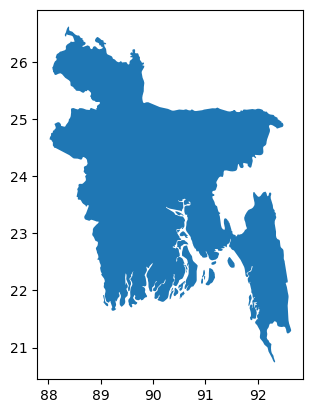

In [17]:
bangladesh.plot()

In [18]:
# Break open the multi-polygon
bangladesh1 = bangladesh.geometry.unary_union

In [19]:
# Make geometry points from the lon-lat coordinates of the bridges 
df_points = gpd.GeoDataFrame(df_bridge_update1, 
                             geometry=gpd.points_from_xy(df_bridge_update1.lon, df_bridge_update1.lat),
                             crs='EPSG:4326')

In [20]:
within_bangladesh = df_points[df_points.geometry.within(bangladesh1)]
outside_bangladesh = df_points[~df_points.geometry.within(bangladesh1)]

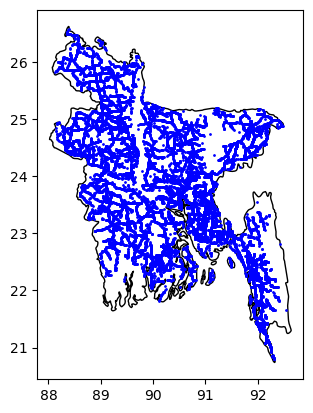

In [21]:
ax = bangladesh.plot(color='white', edgecolor='black')
within_bangladesh.plot(ax=ax, color='blue', markersize=1)
plt.show()

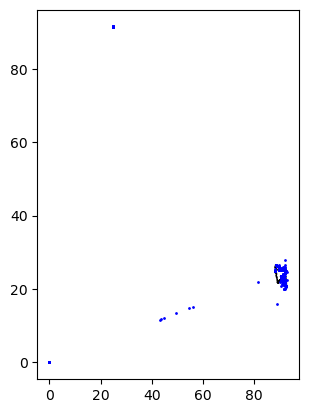

In [22]:
ax = bangladesh.plot(color='white', edgecolor='black')
outside_bangladesh.plot(ax=ax, color='blue', markersize=1)
plt.show()

In [23]:
outside_bangladesh.shape

(449, 21)

In [24]:
outside_bangladesh.isna().sum()

road                  0
km                    1
type                  0
LRPName               0
name                 20
length                0
condition             0
structureNr           0
roadName              0
chainage              0
width               113
constructionYear    113
spans               113
zone                  0
circle                0
division              0
sub-division          0
lat                  60
lon                  60
EstimatedLoc          0
geometry              0
dtype: int64

In [25]:
outside_bangladesh[outside_bangladesh['lat']>30].sort_values(by=['lat'])

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,geometry
17254,R241,38.340,RCC Girder Bridge,LRP038a,BOMBOMI BRIDGE,45.2,C,114981,Auskandi-Raniganj-Jagannathpur-Pagla Road,38.34,...,1964.0,3.0,Sylhet,Sylhet,Sunamganj,Chattak,91.500417,24.867917,bcs1,POINT (24.86792 91.50042)
17252,R241,35.575,Box Culvert,LRP035c,COUNDER NOLA BOX CULVERT,14.4,C,114983,Auskandi-Raniganj-Jagannathpur-Pagla Road,35.575,...,2003.0,3.0,Sylhet,Sylhet,Sunamganj,Chattak,91.516167,24.849861,bcs1,POINT (24.84986 91.51617)
2868,R241,34.978,Box Culvert,LRP035a,TARAKHAI BOX CULVERT,14.4,A,114984,Auskandi-Raniganj-Jagannathpur-Pagla Road,34.978,...,1985.0,3.0,Sylhet,Sylhet,Sunamganj,Chattak,91.518194,24.844972,bcs1,POINT (24.84497 91.51819)
17251,R241,34.785,Truss with Steel Deck,LRP034a,TARA KHAI BRIDGE,57.2,C,114985,Auskandi-Raniganj-Jagannathpur-Pagla Road,34.785,...,1992.0,2.0,Sylhet,Sylhet,Sunamganj,Chattak,91.519389,24.842889,bcs1,POINT (24.84289 91.51939)
17249,R241,33.759,Baily with Steel Deck,LRP033b,GONGUR BAILEY WITH STEEL DECK,14.2,C,114986,Auskandi-Raniganj-Jagannathpur-Pagla Road,33.759,...,1998.0,1.0,Sylhet,Sylhet,Sunamganj,Chattak,91.524083,24.835222,bcs1,POINT (24.83522 91.52408)
2867,R241,33.126,Box Culvert,LRP033a,KOKAL BOX CULVERT,1.0,A,114987,Auskandi-Raniganj-Jagannathpur-Pagla Road,33.126,...,1996.0,1.0,Sylhet,Sylhet,Sunamganj,Chattak,91.527917,24.830944,bcs1,POINT (24.83094 91.52792)
2866,R241,32.713,Box Culvert,LRP032b,KOLKALI BOX CULVERT,3.0,A,114988,Auskandi-Raniganj-Jagannathpur-Pagla Road,32.713,...,1997.0,1.0,Sylhet,Sylhet,Sunamganj,Chattak,91.530556,24.828056,bcs1,POINT (24.82806 91.53056)
17248,R241,32.128,Box Culvert,LRP032a,KHASIRA BOX CULVERT,6.0,C,114989,Auskandi-Raniganj-Jagannathpur-Pagla Road,32.128,...,1992.0,1.0,Sylhet,Sylhet,Sunamganj,Chattak,91.534361,24.823833,bcs1,POINT (24.82383 91.53436)
2865,R241,31.212,Baily with Steel Deck,LRP031a,KHASIRA BAILEY WITH STEEL DECK,17.5,A,114990,Auskandi-Raniganj-Jagannathpur-Pagla Road,31.212,...,1992.0,1.0,Sylhet,Sylhet,Sunamganj,Chattak,91.538722,24.816556,bcs1,POINT (24.81656 91.53872)
17247,R241,28.211,Box Culvert,LRP028a,HIJLA BOX CULVERT,9.2,C,114993,Auskandi-Raniganj-Jagannathpur-Pagla Road,28.211,...,1992.0,2.0,Sylhet,Sylhet,Sunamganj,Chattak,91.541778,24.790944,bcs1,POINT (24.79094 91.54178)


In [26]:
outside_bangladesh[outside_bangladesh['lat']==0]

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,geometry
6681,Z1405,51.682,Truss with Steel Deck,LRP054a,Ajadnagar Bridge,81.51,A,121419,Lakshmipur-Char Alaxandar-Sonapur Road,51.682,...,NaN,NaN,Comilla,Noakhali,Laxmipur,Laxmipur,0.0,0.0,road_precise,POINT (0.00000 0.00000)
7458,Z1811,147.506,RCC Girder Bridge,LRP149d,Naikhongchari Bazar Bridge.,12.50,A,121608,Bandarban-Chimbuk-Thanchi-Alikadam-Baisari-Nai...,147.506,...,NaN,NaN,Chittagong,Rangamati,Bandarban,Bandarban-1,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
12415,Z2813,11.630,PC Girder Bridge,LRP011a,Barohal Bridge,60.00,B,121517,Sunamganj-Tekerhat-Badaghat-Tahirpur Road,11.63,...,NaN,NaN,Sylhet,Sylhet,Sunamganj,Sunamganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
12417,Z2813,18.250,RCC Bridge,LRP018a,Pahartali Bridge,18.00,B,120087,Sunamganj-Tekerhat-Badaghat-Tahirpur Road,18.25,...,NaN,NaN,Sylhet,Sylhet,Sunamganj,Sunamganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
12418,Z2813,24.510,RCC Bridge,LRP024c,Jamalgar Bridge,15.00,B,121521,Sunamganj-Tekerhat-Badaghat-Tahirpur Road,24.51,...,NaN,NaN,Sylhet,Sylhet,Sunamganj,Sunamganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
14794,Z8203,3.492,Truss with Steel Deck,LRP003a,Kathalbari Bridge,36.70,A,120350,Keraniganj (Sayedpur)-Hashara-Birtara-Singpara...,3.492,...,NaN,NaN,Dhaka,Dhaka,Munshiganj,Keraniganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
14795,Z8203,3.930,Truss with Steel Deck,LRP003c,Birtara Bridge,31.20,A,120353,Keraniganj (Sayedpur)-Hashara-Birtara-Singpara...,3.93,...,NaN,NaN,Dhaka,Dhaka,Munshiganj,Keraniganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
14796,Z8203,5.665,Truss with Steel Deck,LRP005a,Beltoli Bridge,36.80,A,120355,Keraniganj (Sayedpur)-Hashara-Birtara-Singpara...,5.665,...,NaN,NaN,Dhaka,Dhaka,Munshiganj,Keraniganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
20114,Z8203,4.717,Baily with Steel Deck,LRP004a,Tingaon Bridge,18.50,C,120354,Keraniganj (Sayedpur)-Hashara-Birtara-Singpara...,4.717,...,NaN,NaN,Dhaka,Dhaka,Munshiganj,Keraniganj,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)
21309,Z7718,38.930,RCC Girder Bridge,LRP038a,Mithakali bridge,19.90,D,119191,Kachua (Pingoria)-Talighati-Herma-Rampal Road,38.93,...,NaN,NaN,Khulna,Khulna,Bagerhat,Bagerhat-2,0.0,0.0,road_interpolate,POINT (0.00000 0.00000)


### What is wrong with the bridges outside Bangladesh
* There are a total of 449 bridges outside Bangladesh
* There are 60 bridges outside Bangladesh without coordinates
* There are 10 bridges with coordinates 0.0
* There are 14 bridges outside Bangladesh whose coordinates are reversed

# Cleaning of the bridge file
## Step 1 - lon/lat switch
As identified above, there are a few bridges of which the lon/lat coordinates got switched. As this is a relatively easy fix, these will be swapped back first 

In [27]:
def flip_lat_lon(df):
    structure_nr_list = []
    
    for index,row in df.iterrows():
        current_lat = row['lat']
        if current_lat > 30:
            current_structure_nr = row['structureNr']
            structure_nr_list.append(current_structure_nr)
    return structure_nr_list   

In [28]:
bridges_flip = df_bridge_update1[df_bridge_update1['lat']>30].sort_values(by=['lat'])

structure_nr_list = flip_lat_lon(bridges_flip)
print(structure_nr_list)  

bridges_to_flip = df_bridges['structureNr'].isin(structure_nr_list)

df_bridge_update1.loc[bridges_to_flip, ['lat', 'lon']] = df_bridge_update1.loc[bridges_to_flip, ['lon', 'lat']].values

[114981, 114983, 114984, 114985, 114986, 114987, 114988, 114989, 114990, 114993, 114992, 114994, 114991, 114995]


In [29]:
# Check if there are no more latitudes left with a value higher than 30
df_bridge_update1[df_bridge_update1['lat']>30].sort_values(by=['lat'])

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc


## Step 2 - merge based on road & LRP
In a perfect data world, all of the bridge have a matching LRP in the cleaned road file. Therefore, this is the first step in the merging and cleaning process.

In [30]:
# Rename the column name for the merge with the road file
df_bridge_update1.rename(columns={'LRPName':'LRP'}, inplace=True)

In [31]:
df_merge_road_LRP = df_bridge_update1.merge(df_roads, on=['road', 'LRP'], how='inner')
df_merge_road_LRP.shape

(13215, 27)

Instead of the desired 19128 bridges, only 13215 can be matched based on road name and LRP. The location of the LRPs do however necessarily match with the lon/lat coordinates; explore what is happening here

In [32]:
def distancer(row):
    coords_1 = (row['lat_x'], row['lon_x'])
    coords_2 = (row['lat_y'], row['lon_y'])
    return geopy.distance.geodesic(coords_1, coords_2).km

df_merge_road_LRP['distance'] = df_merge_road_LRP.apply(distancer, axis=1)

In [33]:
df_merge_road_LRP.describe()

,km,length,structureNr,width,constructionYear,spans,lat_x,lon_x,lat_y,lon_y,len_prev,len_next,calculated_chainage,distance
count,13215.000000,13211.000000,13215.000000,11825.000000,11824.000000,11825.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000
mean,39.209142,14.131920,110282.427317,7.915139,1990.142084,1.435011,23.852383,90.326477,23.854120,90.328038,0.004400,0.003761,0.408317,2.107616
std,75.543618,36.377446,6147.089500,3.358494,10.247109,1.067349,1.174285,1.135478,1.168380,1.135775,0.036237,0.024637,0.747126,13.935264
min,0.000000,0.300000,100002.000000,1.380000,1942.000000,1.000000,20.067056,88.095778,20.790805,88.131888,0.000000,0.000000,0.000000,0.000000
25%,5.875000,2.600000,104859.000000,5.500000,1985.000000,1.000000,22.950750,89.325569,22.950194,89.326708,0.001197,0.000630,0.057785,0.009595
50%,14.300000,4.800000,110159.000000,7.350000,1992.000000,1.000000,23.906556,90.234139,23.906028,90.233305,0.002690,0.002258,0.147761,0.110777
75%,34.090000,12.655000,115471.500000,9.700000,1998.000000,1.000000,24.786875,91.277542,24.785986,91.284111,0.004839,0.004473,0.367124,1.019946
max,516.568000,1786.000000,121859.000000,40.900000,2013.000000,20.000000,27.980972,92.640028,26.614611,92.483305,2.139431,1.008049,5.010077,665.224056


When looking at the distance between the LRP places in the road and bridge file, it becomes clear that most of the merged bridges are less then 1 km deviated. Based on the travel time, and the fact that Bangladesh is a lot bigger and less densely populated then the NY studies found by Lisa, we will take 1 km as the thresehold value <br>
For the bridges that are less then 1km deviated, the coordinates from the road file will be used

In [34]:
def switch_values(original_df):
    large_distance = []
    small_distance = []
    lat_list = []
    lon_list = []
    
    df = original_df.copy()
    
    for row in range(len(df)):
        if df.loc[row, 'distance'] > 1:
            large_bridge = df.loc[row, 'structureNr']
            large_distance.append(large_bridge)
            
        else:
            small_bridge = df.loc[row, 'structureNr']
            small_distance.append(small_bridge)
            
            lat = df.loc[row, 'lat_y']
            lat_list.append(lat)
            lon = df.loc[row, 'lon_y']
            lon_list.append(lon)
            
    lat_dic = {small_distance[i]: lat_list[i] for i in range(len(small_distance))}
    lon_dic = {small_distance[i]: lon_list[i] for i in range(len(small_distance))}
    
    df.set_index('structureNr',inplace=True)
    df.drop(index=large_distance, inplace=True)
    
    df['new_lat'] = pd.Series(lat_dic)
    df['new_lon'] = pd.Series(lon_dic)
    
    return df, large_distance, small_distance

In [35]:
df_road_LRP_clean, list_road_LRP_large, list_road_LRP_small = switch_values(df_merge_road_LRP)

In [36]:
df_road_LRP_clean

,road,km,type_x,LRP,name,length,condition,roadName,chainage,width,...,lat_y,lon_y,type_y,len_prev,len_next,corrected,calculated_chainage,distance,new_lat,new_lon
structureNr,,,,,,,,,,,,,,,,,,,,,
112531,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.88,12.20,...,23.699861,90.530722,NaN,0.003028,0.003913,NaN,0.095017,0.003043,23.699861,90.530722
112532,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.20,...,23.697416,90.533777,NaN,0.003913,0.001289,NaN,0.098930,0.399008,23.697416,90.533777
101110,N1,11.296,Box Culvert,LRP011a,NAYABARI KASPUR BOX CULVERT,8.30,A,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,11.296,21.45,...,23.694361,90.537611,NaN,0.003614,0.004025,NaN,0.103833,0.508770,23.694361,90.537611
101117,N1,12.239,Box Culvert,LRP012a,KHAS PARA BOX CULVERT,9.30,A,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.239,21.00,...,23.691111,90.544889,NaN,0.002381,0.000256,NaN,0.111865,0.419084,23.691111,90.544889
101119,N1,12.253,Box Culvert,LRP012b,DAWAN BAG BOX CULVERT,6.10,A,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.253,20.60,...,23.691055,90.545139,NaN,0.000256,0.001579,NaN,0.112122,0.440487,23.691055,90.545139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119131,Z8717,2.133,Baily with Steel Deck,LRP001d,Lebuburia Bazar steel Bridge,21.50,D,Naikati-Bhandaria Road,2.133,NaN,...,22.566250,90.088389,NaN,0.000150,0.000756,NaN,0.016244,0.000000,22.566250,90.088389
110450,Z8806,46.376,Baily with Steel Deck,LRP046a,.,15.15,D,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,46.376,4.05,...,22.251889,90.551000,NaN,0.006974,0.001317,NaN,0.475077,0.018248,22.251889,90.551000
110467,Z8806,82.461,Box Culvert,LRP082a,.,1.70,D,Lebukhali-Dumki-Boga-Bauphal-Kalaiya-Dashmina-...,82.461,7.60,...,22.185333,90.314194,NaN,0.002511,0.004703,NaN,0.886852,0.006751,22.185333,90.314194


### Updating the bridge file

In [37]:
df_bridge_update2 = update_bridges(df_bridge_update1, list_road_LRP_small)
df_bridge_update2

,road,km,type,LRP,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.8,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702889,90.450389,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
11,N1,12.688,PC Girder Bridge,LRP013b,Madanpur Bridge(R),27.50,A,119900,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.688,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.685362,90.551359,road_interpolate
12,N1,13.574,Box Culvert,LRP014a,KAWTALA BOX CULVERT,11.90,A,109794,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,13.574,22.4,2003.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.685611,90.551194,bcs1
16,N1,19.760,Box Culvert,LRP020a,KRIBORDI BOX CULVERT,6.00,A,109817,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,19.76,21.0,2001.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.646806,90.589917,bcs1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,Z8704,9.497,RCC Girder Bridge,LRP008c,.,5.70,D,113699,Jhalokati-Nabagram-Gava-Ekshirapara Road,9.497,3.7,1969.0,1.0,Barisal,Barisal,Jhalokati,Jhalokati,22.724639,90.211611,bcs1
21396,Z8708,75.398,Truss with Steel Deck,LRP074a,Patharghata Steel Bridge,68.93,D,119048,Rajapur-Kathalia-Amua-Bamna-Patharghata Road,75.398,NaN,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,NaN,NaN,error
21399,Z8803,22.230,Steel Beam & RCC Slab,LRP022a,.,90.00,D,116791,Barguna (Chandukhali)-Betagi-Bakerganj(Padri S...,22.23,3.6,1992.0,11.0,Barisal,Patuakhali,Barguna,Barguna,22.430278,90.182778,bcs1
21404,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.73,NaN,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,road_interpolate


In [38]:
df_bridge_update2.isna().sum()

road                  0
km                    1
type                  0
LRP                   0
name                 62
length                1
condition             0
structureNr           0
roadName              1
chainage              0
width               503
constructionYear    504
spans               503
zone                  1
circle                1
division              1
sub-division          1
lat                  60
lon                  60
EstimatedLoc          0
dtype: int64

## Step 3 - merging based on road and chainage
Since not the project does not ask for meter precision, the chainage will be rounded down to two decimals, after which the files will be merged

In [39]:
df_bridge_update2.dtypes

road                 object
km                  float64
type                 object
LRP                  object
name                 object
length              float64
condition            object
structureNr           int64
roadName             object
chainage             object
width               float64
constructionYear    float64
spans               float64
zone                 object
circle               object
division             object
sub-division         object
lat                 float64
lon                 float64
EstimatedLoc         object
dtype: object

In [40]:
# Conver the chainage datatype to a float, so it can be rounded
df_bridge_update2['chainage'] = df_bridge_update2['chainage'].replace(' ', '')
df_bridge_update2['chainage'] = pd.to_numeric(df_bridge_update2['chainage'])
df_bridge_update2.dtypes

road                 object
km                  float64
type                 object
LRP                  object
name                 object
length              float64
condition            object
structureNr           int64
roadName             object
chainage            float64
width               float64
constructionYear    float64
spans               float64
zone                 object
circle               object
division             object
sub-division         object
lat                 float64
lon                 float64
EstimatedLoc         object
dtype: object

In [41]:
# Rename the column name for the merge with the road file
df_roads.rename(columns={'calculated_chainage':'chainage'}, inplace=True)

In [42]:
# Round down the chainage columns in the bridge and road dataframes
df_bridge_update2['chainage_round'] = df_bridge_update2['chainage'].round(2)
df_roads['chainage_round'] = df_roads['chainage'].round(2)

In [43]:
df_merge_road_chain = df_bridge_update2.merge(df_roads, on=['road', 'chainage_round'], how='inner')
df_merge_road_chain.shape

(205, 29)

In [45]:
df_merge_road_chain.columns

Index(['road', 'km', 'type_x', 'LRP_x', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage_x', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat_x', 'lon_x',
       'EstimatedLoc', 'chainage_round', 'LRP_y', 'lat_y', 'lon_y', 'type_y',
       'len_prev', 'len_next', 'corrected', 'chainage_y', 'distance'],
      dtype='object')

In [46]:
# Subset the columns so that the 'old data' from the bridge file is deleted
columns_subset_chain = ['road', 'km', 'type_x', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division',
       'EstimatedLoc', 'chainage_round', 'LRP_y', 'lat_y', 'lon_y', 'type_y',
       'len_prev', 'len_next', 'corrected', 'chainage_y', 'distance']

# Make a new dataframe and rename the columns
df_road_chain_clean = pd.DataFrame(df_merge_road_chain, columns=columns_subset_chain)
df_road_chain_clean.rename(columns={'type_x':'type_bridge', 'LRP_y':'LRP', 'lat_y':'lat', 
                                     'lon_y':'lon', 'type_y':'road_type', 'chainage_y':'chainage'}, inplace=True)

df_road_chain_clean.shape

(205, 26)

### Update the bridge file

In [47]:
road_chain_list = df_road_chain_clean['structureNr'].tolist()

df_bridge_update3 = update_bridges(df_bridge_update2, road_chain_list)
df_bridge_update3

,road,km,type,LRP,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,chainage_round
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1,4.92
11,N1,12.688,PC Girder Bridge,LRP013b,Madanpur Bridge(R),27.50,A,119900,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.688,...,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.685362,90.551359,road_interpolate,12.69
12,N1,13.574,Box Culvert,LRP014a,KAWTALA BOX CULVERT,11.90,A,109794,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,13.574,...,2003.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.685611,90.551194,bcs1,13.57
16,N1,19.760,Box Culvert,LRP020a,KRIBORDI BOX CULVERT,6.00,A,109817,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,19.760,...,2001.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.646806,90.589917,bcs1,19.76
18,N1,21.184,PC Girder Bridge,LRP021d,Marikhali Bridge(R),89.75,A,119948,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,...,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate,21.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,Z8704,9.497,RCC Girder Bridge,LRP008c,.,5.70,D,113699,Jhalokati-Nabagram-Gava-Ekshirapara Road,9.497,...,1969.0,1.0,Barisal,Barisal,Jhalokati,Jhalokati,22.724639,90.211611,bcs1,9.50
21396,Z8708,75.398,Truss with Steel Deck,LRP074a,Patharghata Steel Bridge,68.93,D,119048,Rajapur-Kathalia-Amua-Bamna-Patharghata Road,75.398,...,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,NaN,NaN,error,75.40
21399,Z8803,22.230,Steel Beam & RCC Slab,LRP022a,.,90.00,D,116791,Barguna (Chandukhali)-Betagi-Bakerganj(Padri S...,22.230,...,1992.0,11.0,Barisal,Patuakhali,Barguna,Barguna,22.430278,90.182778,bcs1,22.23
21404,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,...,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,road_interpolate,20.73


## Step 4 - merging based on lon/lat and road

In [48]:
df_merge_coord_road = df_bridge_update3.merge(df_roads, on=['lon', 'lat', 'road'], how='inner')
df_merge_coord_road.shape

(44, 28)

In [49]:
df_merge_coord_road.columns

Index(['road', 'km', 'type_x', 'LRP_x', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage_x', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc', 'chainage_round_x', 'LRP_y', 'type_y', 'len_prev',
       'len_next', 'corrected', 'chainage_y', 'chainage_round_y'],
      dtype='object')

In [50]:
# Subset the columns so that the 'old data' from the bridge file is deleted
columns_subset_coord = ['road', 'km', 'type_x', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc', 'LRP_y', 'type_y', 'len_prev', 'len_next', 'corrected', 
        'chainage_y']

# Make a new dataframe and rename the columns
df_coord_road_clean = pd.DataFrame(df_merge_coord_road, columns=columns_subset_coord)
df_coord_road_clean.rename(columns={'type_x':'type_bridge', 'LRP_y':'LRP', 'type_y':'road_type', 
                                    'chainage_y':'chainage'}, inplace=True)

df_coord_road_clean.shape

(44, 24)

### Update the bridge file

In [51]:
coord_road_list = df_coord_road_clean['structureNr'].tolist()

df_bridge_update4 = update_bridges(df_bridge_update3, coord_road_list)
df_bridge_update4

,road,km,type,LRP,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,chainage_round
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1,4.92
11,N1,12.688,PC Girder Bridge,LRP013b,Madanpur Bridge(R),27.50,A,119900,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.688,...,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.685362,90.551359,road_interpolate,12.69
12,N1,13.574,Box Culvert,LRP014a,KAWTALA BOX CULVERT,11.90,A,109794,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,13.574,...,2003.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.685611,90.551194,bcs1,13.57
16,N1,19.760,Box Culvert,LRP020a,KRIBORDI BOX CULVERT,6.00,A,109817,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,19.760,...,2001.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.646806,90.589917,bcs1,19.76
18,N1,21.184,PC Girder Bridge,LRP021d,Marikhali Bridge(R),89.75,A,119948,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,...,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate,21.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,Z8704,9.497,RCC Girder Bridge,LRP008c,.,5.70,D,113699,Jhalokati-Nabagram-Gava-Ekshirapara Road,9.497,...,1969.0,1.0,Barisal,Barisal,Jhalokati,Jhalokati,22.724639,90.211611,bcs1,9.50
21396,Z8708,75.398,Truss with Steel Deck,LRP074a,Patharghata Steel Bridge,68.93,D,119048,Rajapur-Kathalia-Amua-Bamna-Patharghata Road,75.398,...,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,NaN,NaN,error,75.40
21399,Z8803,22.230,Steel Beam & RCC Slab,LRP022a,.,90.00,D,116791,Barguna (Chandukhali)-Betagi-Bakerganj(Padri S...,22.230,...,1992.0,11.0,Barisal,Patuakhali,Barguna,Barguna,22.430278,90.182778,bcs1,22.23
21404,Z8814,20.730,Baily with Steel Deck,LRP020b,Kalbari Bridge,30.50,D,121147,Barguna (Dakhin Ramna Kheya Ghat)-Dewatala-Mat...,20.730,...,NaN,NaN,Barisal,Barisal,Pirojpur,Kawkhali,22.282704,89.968512,road_interpolate,20.73


## Step 5 - find closest coordinates with geopandas
For the final step, GeoPandas will be utilized. With GP, the distance from each LRP in the road file, will be calculated to each LRP in the (updated) bridge file. From this, the smallest distance will be taken, given the constainst of smaller then 1km, and the LRPs have to be part of the same road <br>
CRS bangladesh = https://epsg.io/102951 <br>
code inspiration = https://gis.stackexchange.com/questions/237770/projection-for-germany-that-preserves-distance/237782#237782

In [54]:
gpd_roads = gpd.GeoDataFrame(df_roads, geometry=gpd.points_from_xy(df_roads.lon, df_roads.lat))
gpd_bridge4 = gpd.GeoDataFrame(df_bridge_update4, geometry=gpd.points_from_xy(df_bridge_update4.lon, df_bridge_update4.lat))

In [55]:
gpd_roads.crs = "EPSG:32645"
gpd_bridge4.crs = "EPSG:32645"

In [56]:
#Dont need acurray down to the millimeter, common transverse mercatro coordinate system bangladesh
gpd_roads = gpd_roads.to_crs("EPSG:32645") 
gpd_bridge4 = gpd_bridge4.to_crs("EPSG:32645")

In [57]:
#Use max distance to not overrun the computer
df_points_close = gpd.sjoin_nearest(gpd_roads, gpd_bridge4, distance_col="distances",
                                 lsuffix="left", rsuffix="right", exclusive=True, max_distance=1000)
df_points_close

,road_left,LRP_left,lat_left,lon_left,type_left,len_prev,len_next,corrected,chainage_left,chainage_round_left,...,spans,zone,circle,division,sub-division,lat_right,lon_right,EstimatedLoc,chainage_round_right,distances
0,N1,LRPS,23.706028,90.443333,Start point,0.000000,0.007737,NaN,0.000000,0.00,...,1.0,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.018266
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150,NaN,0.007737,0.01,...,1.0,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.015097
9851,R110,LRPSa,23.711056,90.438750,NaN,0.004562,0.004724,NaN,0.004562,0.00,...,1.0,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.020767
9852,R110,LRP001,23.710528,90.443444,NaN,0.004724,0.009661,NaN,0.009286,0.01,...,1.0,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.016345
9853,R110,LRP001a,23.713222,90.452722,NaN,0.009661,0.000782,NaN,0.018947,0.02,...,1.0,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.006685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52202,Z8943,LRP006a,22.428666,90.788416,NaN,0.006774,0.000056,NaN,0.062386,0.06,...,NaN,Barisal,Barisal,Bhola,Bhola,22.428621,90.788543,road_interpolate,6.69,0.000134
52203,Z8943,LRP006b,22.428722,90.788416,NaN,0.000056,0.000290,NaN,0.062441,0.06,...,NaN,Barisal,Barisal,Bhola,Bhola,22.428621,90.788543,road_interpolate,6.69,0.000162
52204,Z8943,LRP006c,22.428805,90.788139,NaN,0.000290,0.002514,NaN,0.062731,0.06,...,1.0,Barisal,Barisal,Bhola,Bhola,22.428889,90.788333,bcs1,8.61,0.000212
52205,Z8943,LRP007,22.429499,90.785722,NaN,0.002514,0.009409,NaN,0.065246,0.07,...,1.0,Barisal,Barisal,Bhola,Bhola,22.428889,90.788333,bcs1,8.61,0.002682


website to calculate the distance between to lon/lat points, in order to confirm that the calculations performed where done correctly <br>
https://www.movable-type.co.uk/scripts/latlong.html

In [58]:
#checked with website above when the distance is in the ride order of magintude 
df_points_close['dist_km'] = df_points_close['distances']*100
df_points_close.head(5)

,road_left,LRP_left,lat_left,lon_left,type_left,len_prev,len_next,corrected,chainage_left,chainage_round_left,...,zone,circle,division,sub-division,lat_right,lon_right,EstimatedLoc,chainage_round_right,distances,dist_km
0,N1,LRPS,23.706028,90.443333,Start point,0.000000,0.007737,NaN,0.000000,0.00,...,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.018266,1.826568
1,N1,LRPSa,23.702917,90.450417,NaN,0.007737,0.000150,NaN,0.007737,0.01,...,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.015097,1.509658
9851,R110,LRPSa,23.711056,90.438750,NaN,0.004562,0.004724,NaN,0.004562,0.00,...,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.020767,2.076736
9852,R110,LRP001,23.710528,90.443444,NaN,0.004724,0.009661,NaN,0.009286,0.01,...,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.016345,1.634466
9853,R110,LRP001a,23.713222,90.452722,NaN,0.009661,0.000782,NaN,0.018947,0.02,...,Dhaka,Dhaka,Dhaka,"Dhaka, Sub-division - 2",23.715278,90.459083,bcs1,2.62,0.006685,0.668501


In [102]:
df_close_large = df_points_close.copy()
df_close_large.sort_values(by='dist_km', inplace=True)
df_close_large.drop_duplicates(subset=['structureNr'], inplace=True)
df_close_large

,road_left,LRP_left,lat_left,lon_left,type_left,len_prev,len_next,corrected,chainage_left,chainage_round_left,...,zone,circle,division,sub-division,lat_right,lon_right,EstimatedLoc,chainage_round_right,distances,dist_km
4964,N5,LRP069,23.845694,89.840472,NaN,0.002615,0.008448,NaN,0.715067,0.72,...,Dhaka,Dhaka,Manikganj,Manikganj,23.845694,89.840472,road_chainage,68.94,3.552714e-15,3.552714e-13
6046,N502,LRP030,24.596889,89.238055,NaN,0.009497,0.000299,NaN,0.301080,0.30,...,Rangpur,Bogra,Bogra,Sherpur (Bogra),24.596889,89.238055,road_chainage,29.02,3.552714e-15,3.552714e-13
10946,R160,LRP027a,22.719499,91.782972,NaN,0.002389,0.000139,NaN,0.230979,0.23,...,Chittagong,Chittagong,Chittagong,Fatikchari,22.719499,91.782972,road_chainage,25.71,3.552714e-15,3.552714e-13
36982,Z5072,LRP036,24.922749,89.450083,NaN,0.006604,0.003445,NaN,0.369025,0.37,...,Rangpur,Bogra,Bogra,Bogra,24.922749,89.450083,road_chainage,37.52,3.552714e-15,3.552714e-13
41821,Z6802,LRP023a,24.818833,88.326527,NaN,0.002455,0.000686,NaN,0.204852,0.20,...,Rajshahi,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage,21.81,1.421085e-14,1.421085e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32071,Z3703,LRP020a,25.074249,90.891222,NaN,0.001680,0.002259,NaN,0.188168,0.19,...,Dhaka,Dhaka,Narsingdi,Shibpur,25.056806,90.969583,bcs1,69.28,8.027950e-02,8.027950e+00
31344,Z3601,LRPE,24.275083,91.102806,End point,0.000660,0.000000,NaN,0.398502,0.40,...,Comilla,Comilla,Comilla,Comilla,24.366056,91.165194,road_precise,4.11,1.103106e-01,1.103106e+01
23405,Z1122,LRPS,21.760139,92.584472,Start point,0.000000,0.515586,NaN,0.000000,0.00,...,Chittagong,Rangamati,Bandarban,Bandarban-1,21.652417,92.552417,bcs1,112.92,1.123905e-01,1.123905e+01
29584,Z2807,LRPE,24.667805,91.274722,End point,0.008880,0.000000,NaN,0.756314,0.76,...,Sylhet,Moulavi Bazar,Habiganj,Habigonj,24.530417,91.345333,bcs1,19.70,1.544718e-01,1.544718e+01


In [104]:
df_close_large[df_close_large['structureNr']==118811]

,road_left,LRP_left,lat_left,lon_left,type_left,len_prev,len_next,corrected,chainage_left,chainage_round_left,...,zone,circle,division,sub-division,lat_right,lon_right,EstimatedLoc,chainage_round_right,distances,dist_km
41821,Z6802,LRP023a,24.818833,88.326527,NaN,0.002455,0.000686,NaN,0.204852,0.2,...,Rajshahi,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage,21.81,1.421085e-14,1.421085e-12


In [103]:
# check if it worked; it did
df_points_close[(df_points_close['structureNr']==118811)&(df_points_close['road_left']=='Z6802')].sort_values(by='dist_km')

,road_left,LRP_left,lat_left,lon_left,type_left,len_prev,len_next,corrected,chainage_left,chainage_round_left,...,zone,circle,division,sub-division,lat_right,lon_right,EstimatedLoc,chainage_round_right,distances,dist_km
41821,Z6802,LRP023a,24.818833,88.326527,NaN,0.002455,0.000686,NaN,0.204852,0.20,...,Rajshahi,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage,21.81,1.421085e-14,1.421085e-12
41822,Z6802,LRP023b,24.819416,88.326166,NaN,0.000686,0.000299,NaN,0.205538,0.21,...,Rajshahi,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage,21.81,6.860263e-04,6.860263e-02
41823,Z6802,LRP023c,24.819527,88.326444,NaN,0.000299,0.002760,NaN,0.205837,0.21,...,Rajshahi,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage,21.81,6.993785e-04,6.993785e-02


In [106]:
# Check if the roads are the same, only keep the ones that are 
df_close_large['roads_equal'] = df_close_large.apply(lambda row: row['road_left'] == row['road_right'], axis=1)
df_close_road_same = df_close_large[df_close_large['roads_equal']==True]
df_close_road_same

,road_left,LRP_left,lat_left,lon_left,type_left,len_prev,len_next,corrected,chainage_left,chainage_round_left,...,circle,division,sub-division,lat_right,lon_right,EstimatedLoc,chainage_round_right,distances,dist_km,roads_equal
4964,N5,LRP069,23.845694,89.840472,NaN,0.002615,0.008448,NaN,0.715067,0.72,...,Dhaka,Manikganj,Manikganj,23.845694,89.840472,road_chainage,68.94,3.552714e-15,3.552714e-13,True
6046,N502,LRP030,24.596889,89.238055,NaN,0.009497,0.000299,NaN,0.301080,0.30,...,Bogra,Bogra,Sherpur (Bogra),24.596889,89.238055,road_chainage,29.02,3.552714e-15,3.552714e-13,True
10946,R160,LRP027a,22.719499,91.782972,NaN,0.002389,0.000139,NaN,0.230979,0.23,...,Chittagong,Chittagong,Fatikchari,22.719499,91.782972,road_chainage,25.71,3.552714e-15,3.552714e-13,True
36982,Z5072,LRP036,24.922749,89.450083,NaN,0.006604,0.003445,NaN,0.369025,0.37,...,Bogra,Bogra,Bogra,24.922749,89.450083,road_chainage,37.52,3.552714e-15,3.552714e-13,True
41821,Z6802,LRP023a,24.818833,88.326527,NaN,0.002455,0.000686,NaN,0.204852,0.20,...,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage,21.81,1.421085e-14,1.421085e-12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44201,Z7108,LRP034,23.519277,89.930722,NaN,0.007546,0.008818,NaN,0.308731,0.31,...,Faridpur,Faridpur,Faridpur-2,23.535000,89.968889,bcs1,33.57,4.127895e-02,4.127895e+00,True
31218,Z3040,LRP014a,25.152222,90.272999,NaN,0.002299,0.007029,NaN,0.151282,0.15,...,Jamalpur,Sherpur,Sherpur-1,25.110111,90.279306,bcs1,6.56,4.258066e-02,4.258066e+00,True
31211,Z3040,LRP013,25.153194,90.264806,NaN,0.002105,0.000000,NaN,0.138198,0.14,...,Jamalpur,Sherpur,Sherpur-1,25.108889,90.272722,bcs1,7.24,4.500724e-02,4.500724e+00,True
19604,R890,LRP007,22.674555,90.652056,NaN,0.008222,0.009268,NaN,0.060535,0.06,...,Barisal,Bhola,Charfession,22.696944,90.692778,bcs1,88.49,4.647136e-02,4.647136e+00,True


In [169]:
close_columns_sub = ['structureNr', 'road_left', 'LRP_left', 'lat_left', 'lon_left', 'chainage_left', 'km', 'type_left',
       'geometry', 'name', 'length', 'condition', 'roadName', 'width', 'constructionYear', 'spans',
       'zone', 'circle', 'division', 'sub-division', 
       'EstimatedLoc', 'dist_km']

df_close_large = pd.DataFrame(df_close_road_same, columns=close_columns_sub)
df_close_large.rename(columns={'road_left':'road', 'LRP_left':'LRP', 'lat_left':'lat', 
                               'lon_left':'lon', 'chainage_left':'chainage', 'type_left':'type'}, inplace=True)

df_close_clean = df_close_large[df_close_large['dist_km']<1]
df_close_clean

,structureNr,road,LRP,lat,lon,chainage,km,type,geometry,name,...,roadName,width,constructionYear,spans,zone,circle,division,sub-division,EstimatedLoc,dist_km
4964,120077,N5,LRP069,23.845694,89.840472,0.715067,68.936,NaN,POINT (89.840 23.846),Small Kustia Bridge,...,Dhaka (Mirpur)-Utholi-Paturia- Natakhola-Kashi...,NaN,NaN,NaN,Dhaka,Dhaka,Manikganj,Manikganj,road_chainage,3.552714e-13
6046,119365,N502,LRP030,24.596889,89.238055,0.301080,29.023,NaN,POINT (89.238 24.597),NaN,...,Bogra (Jahangirabad)-Natore Road,NaN,NaN,NaN,Rangpur,Bogra,Bogra,Sherpur (Bogra),road_chainage,3.552714e-13
10946,121148,R160,LRP027a,22.719499,91.782972,0.230979,25.713,NaN,POINT (91.783 22.719),Paindang Bridge,...,Hathazari-Fatikchhari-Manikchhari-Matiranga-Kh...,NaN,NaN,NaN,Chittagong,Chittagong,Chittagong,Fatikchari,road_chainage,3.552714e-13
36982,119730,Z5072,LRP036,24.922749,89.450083,0.369025,37.520,NaN,POINT (89.450 24.923),NaN,...,Dhunot-Nanglu-Baliadighi-Poradah-Patch Mile-Ga...,NaN,NaN,NaN,Rangpur,Bogra,Bogra,Bogra,road_chainage,3.552714e-13
41821,118811,Z6802,LRP023a,24.818833,88.326527,0.204852,21.807,NaN,POINT (88.327 24.819),Kolonimorh Bridge,...,Kansat-Gomostapur-Rohonpur (Bhangabari) Road,NaN,NaN,NaN,Rajshahi,Rajshahi,Nawabganj,Nawabganj,road_chainage,1.421085e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46093,112680,Z7606,LRP023a,22.609472,89.523305,4.490384,21.992,NaN,POINT (89.523 22.609),Sluice gate.,...,Gollamari-Batiaghata-Dacope-Nalian Forest Road,3.75,1990.0,1.0,Khulna,Khulna,Khulna,Khulna-2,bcs1,9.864675e-01
39651,115117,Z5623,LRP008,25.592583,89.601111,0.063231,7.070,NaN,POINT (89.601 25.593),.,...,Ulipur-Bojra-Chillmari Road,8.10,2004.0,1.0,Rangpur,Rangpur,Kurigram,Kurigram - 1,bcs1,9.890805e-01
28448,118401,Z2034,LRP006,24.115667,90.649750,0.073781,6.300,NaN,POINT (90.650 24.116),.,...,Lakpur-Kamargaon-Gagutia-Katiadi (Motkhola) Road,4.49,1997.0,1.0,Dhaka,Dhaka,Narsingdi,Shibpur,bcs1,9.900845e-01
39672,115127,Z5623,LRP014c,25.577555,89.633055,0.131929,9.520,NaN,POINT (89.633 25.578),.,...,Ulipur-Bojra-Chillmari Road,4.50,1990.0,1.0,Rangpur,Rangpur,Kurigram,Kurigram - 1,bcs1,9.934502e-01


In [170]:
close_list = df_close_clean['structureNr'].to_list()
df_bridge_update5 = update_bridges(df_bridge_update4, close_list)
df_bridge_update5

,road,km,type,LRP,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,chainage_round
18,N1,21.184,PC Girder Bridge,LRP021d,Marikhali Bridge(R),89.75,A,119948,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,...,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate,21.18
89,N1,148.174,PC Girder Bridge,LRP149b,Rampur Bridge(R),22.15,A,121134,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,148.174,...,NaN,NaN,Comilla,Noakhali,Feni,Feni-1,22.994594,91.402454,road_interpolate,148.17
100,N1,171.728,Box Culvert,LRP172b,MADDUM SONAPHAR-3,2.00,A,101247,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,171.728,...,1985.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.859639,91.542972,bcs1,171.73
124,N1,196.038,Box Culvert,LRP198a,SATU DURUAR HAT BOX CULVERT,3.00,A,100565,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,196.038,...,1986.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.659778,91.634944,bcs1,196.04
131,N1,200.918,Slab Culvert,LRP203a,SITAKUNDA SLAB,3.00,A,100573,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,200.918,...,1983.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.620861,91.656972,bcs1,200.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21309,Z7718,38.930,RCC Girder Bridge,LRP038a,Mithakali bridge,19.90,D,119191,Kachua (Pingoria)-Talighati-Herma-Rampal Road,38.930,...,NaN,NaN,Khulna,Khulna,Bagerhat,Bagerhat-2,0.000000,0.000000,road_interpolate,38.93
21327,Z8009,4.350,Baily with Steel Deck,LRP014a,.,18.80,D,116463,Dohar (Fultala)-Srinagar (Hashara) Road,4.350,...,1996.0,1.0,Dhaka,Dhaka,Munshiganj,Sreenagar,23.604750,90.269333,bcs1,4.35
21391,Z8704,7.912,RCC Girder Bridge,LRP007b,NaN,10.40,D,119265,Jhalokati-Nabagram-Gava-Ekshirapara Road,7.912,...,NaN,NaN,Barisal,Barisal,Jhalokati,Jhalokati,22.712485,90.208537,road_interpolate,7.91
21396,Z8708,75.398,Truss with Steel Deck,LRP074a,Patharghata Steel Bridge,68.93,D,119048,Rajapur-Kathalia-Amua-Bamna-Patharghata Road,75.398,...,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,NaN,NaN,error,75.40


# Concat the four cleaned bridge dataframes together
Make sure the final bridge file has the same layout as the origional BMMS file

In [119]:
df_bridges.columns

Index(['road', 'km', 'type', 'LRPName', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc'],
      dtype='object')

In [114]:
df_road_LRP_clean.columns

Index(['road', 'km', 'type_x', 'LRP', 'name', 'length', 'condition',
       'roadName', 'chainage', 'width', 'constructionYear', 'spans', 'zone',
       'circle', 'division', 'sub-division', 'lat_x', 'lon_x', 'EstimatedLoc',
       'lat_y', 'lon_y', 'type_y', 'len_prev', 'len_next', 'corrected',
       'calculated_chainage', 'distance', 'new_lat', 'new_lon'],
      dtype='object')

In [122]:
sub_road_lrp = ['road', 'km', 'type_x', 'LRP', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'calculated_chainage', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'new_lat', 'new_lon',
       'EstimatedLoc']
df_road_LRP_final = pd.DataFrame(df_road_LRP_clean, columns=sub_road_lrp)
df_road_LRP_final.rename(columns={'type_x':'type', 'LRP':'LRPName', 'calculated_chainage':'chainage', 'new_lat':'lat', 'new_lon':'lon'}, inplace=True)
df_road_LRP_final.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.3,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.095017,12.20,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699861,90.530722,bcs1
1,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.3,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.098930,12.20,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.697416,90.533777,bcs1
2,N1,11.296,Box Culvert,LRP011a,NAYABARI KASPUR BOX CULVERT,8.3,A,101110,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.103833,21.45,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694361,90.537611,bcs1
3,N1,12.239,Box Culvert,LRP012a,KHAS PARA BOX CULVERT,9.3,A,101117,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.111865,21.00,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1
4,N1,12.253,Box Culvert,LRP012b,DAWAN BAG BOX CULVERT,6.1,A,101119,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.112122,20.60,1987.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691055,90.545139,bcs1


In [115]:
df_road_chain_clean.columns

Index(['road', 'km', 'type_bridge', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'width', 'constructionYear', 'spans', 'zone',
       'circle', 'division', 'sub-division', 'EstimatedLoc', 'chainage_round',
       'LRP', 'lat', 'lon', 'road_type', 'len_prev', 'len_next', 'corrected',
       'chainage', 'distance'],
      dtype='object')

In [126]:
sub_road_chain = ['road', 'km', 'type_bridge', 'LRP', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc']
df_road_chain_final = pd.DataFrame(df_road_chain_clean, columns=sub_road_chain)
df_road_chain_final.rename(columns={'type_bridge':'type', 'LRP':'LRPName'}, inplace=True)
df_road_chain_final.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP189,.,11.3,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.795634,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,22.743555,91.594916,bcs1
1,N1,1.800,Box Culvert,LRP189a,.,11.3,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.795907,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,22.743305,91.595027,bcs1
2,N1,1.800,Box Culvert,LRP190,.,11.3,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.804710,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,22.735000,91.597944,bcs1
3,N1,1.800,Box Culvert,LRP190a,.,11.3,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.804798,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,22.734916,91.597972,bcs1
4,N102,0.984,Box Culvert,LRP074,PORISPUR BOX CULVERT,3.0,A,101312,Comilla (Mainamati)-Brahmanbaria (Sarail) Road,0.978528,9.7,1988.0,1.0,Comilla,Comilla,Comilla,Gouripur,23.979055,91.100333,bcs1


In [129]:
df_merge_coord_road.head(1)

,road,km,type_x,LRP_x,name,length,condition,structureNr,roadName,chainage_x,...,lon,EstimatedLoc,chainage_round_x,LRP_y,type_y,len_prev,len_next,corrected,chainage_y,chainage_round_y
0,R151,13.73,RCC Girder Bridge,LRP014c,Niharkanti Das Bridge,42.0,A,121375,Baraiyerhat-Karerhat-Heako-Narayanhat-Fatikchh...,13.73,...,91.623972,road_chainage,13.73,LRP014,NaN,0.00074,0.002357,NaN,0.122203,0.12


In [128]:
df_merge_coord_road.columns

Index(['road', 'km', 'type_x', 'LRP_x', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage_x', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc', 'chainage_round_x', 'LRP_y', 'type_y', 'len_prev',
       'len_next', 'corrected', 'chainage_y', 'chainage_round_y'],
      dtype='object')

In [130]:
sub_road_coord = ['road', 'km', 'type_x', 'LRP_y', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage_y', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc']
df_road_coord_final = pd.DataFrame(df_merge_coord_road, columns=sub_road_coord)
df_road_coord_final.rename(columns={'type_x':'type', 'LRP_y':'LRPName', 'chainage_y':'chainage'}, inplace=True)
df_road_coord_final.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,R151,13.730,RCC Girder Bridge,LRP014,Niharkanti Das Bridge,42.00,A,121375,Baraiyerhat-Karerhat-Heako-Narayanhat-Fatikchh...,0.122203,NaN,NaN,NaN,Chittagong,Chittagong,Chittagong,Sitakunda,22.909056,91.623972,road_chainage
1,R171,10.878,Truss with Steel Deck,LRP009f,Monir Fokir Hat Bridge,20.00,A,121447,Banshkhali (Charati)-Chunti Road,0.104052,NaN,NaN,NaN,Chittagong,Chittagong,Dohazari,Dohazari,22.007500,92.053944,road_chainage
2,R282,2.936,PC Girder Bridge,LRP002c,Juri Bridge-1,36.25,A,121680,Juri-Lathidila Road,0.026542,NaN,NaN,NaN,Sylhet,Moulavi Bazar,Moulavi Bazar,Kulaura,24.584000,92.134777,road_chainage
3,R880,21.906,RCC Girder Bridge,LRP022c,Amragachia Bazar Bridge,41.00,A,119026,Patuakhali-Amtali-Barguna-Kacchira Road,0.199188,NaN,NaN,NaN,Barisal,Patuakhali,Patuakhali,Patuakhali,22.181555,90.272027,road_chainage
4,R880,45.100,RCC Girder Bridge,LRP046,Croke bridge,27.97,A,119022,Patuakhali-Amtali-Barguna-Kacchira Road,0.410016,NaN,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,22.157889,90.104750,road_chainage


In [172]:
df_close_clean.columns

Index(['structureNr', 'road', 'LRP', 'lat', 'lon', 'chainage', 'km', 'type',
       'geometry', 'name', 'length', 'condition', 'roadName', 'width',
       'constructionYear', 'spans', 'zone', 'circle', 'division',
       'sub-division', 'EstimatedLoc', 'dist_km'],
      dtype='object')

In [174]:
sub_close_final = ['road', 'km', 'type', 'LRP', 'name', 'length', 'condition',
       'structureNr', 'roadName', 'chainage', 'width', 'constructionYear',
       'spans', 'zone', 'circle', 'division', 'sub-division', 'lat', 'lon',
       'EstimatedLoc']
df_clean_final = pd.DataFrame(df_close_clean, columns=sub_close_final)
df_clean_final.rename(columns={'LRP':'LRPName'}, inplace=True)
df_clean_final.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
4964,N5,68.936,NaN,LRP069,Small Kustia Bridge,18.93,C,120077,Dhaka (Mirpur)-Utholi-Paturia- Natakhola-Kashi...,0.715067,NaN,NaN,NaN,Dhaka,Dhaka,Manikganj,Manikganj,23.845694,89.840472,road_chainage
6046,N502,29.023,NaN,LRP030,NaN,10.70,C,119365,Bogra (Jahangirabad)-Natore Road,0.301080,NaN,NaN,NaN,Rangpur,Bogra,Bogra,Sherpur (Bogra),24.596889,89.238055,road_chainage
10946,R160,25.713,NaN,LRP027a,Paindang Bridge,18.50,C,121148,Hathazari-Fatikchhari-Manikchhari-Matiranga-Kh...,0.230979,NaN,NaN,NaN,Chittagong,Chittagong,Chittagong,Fatikchari,22.719499,91.782972,road_chainage
36982,Z5072,37.520,NaN,LRP036,NaN,41.60,C,119730,Dhunot-Nanglu-Baliadighi-Poradah-Patch Mile-Ga...,0.369025,NaN,NaN,NaN,Rangpur,Bogra,Bogra,Bogra,24.922749,89.450083,road_chainage
41821,Z6802,21.807,NaN,LRP023a,Kolonimorh Bridge,34.80,C,118811,Kansat-Gomostapur-Rohonpur (Bhangabari) Road,0.204852,NaN,NaN,NaN,Rajshahi,Rajshahi,Nawabganj,Nawabganj,24.818833,88.326527,road_chainage


In [182]:
shape_LRP = df_road_LRP_final.shape
shape_chain = df_road_chain_final.shape
shape_coord = df_road_coord_final.shape
shape_close = df_clean_final.shape
final_cleaned = shape_LRP[0] + shape_chain[0] + shape_coord[0] + shape_close[0]

print(f' {shape_LRP} {shape_chain} {shape_coord} {shape_close} --> total bridges cleaned {final_cleaned}')

 (9864, 20) (205, 20) (44, 20) (7235, 20) --> total bridges cleaned 17348


In [183]:
dataframes = [df_road_LRP_final, df_road_chain_final, df_road_coord_final, df_clean_final]
df_bridges_cleaned = pd.concat(dataframes)
df_bridges_cleaned

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.095017,12.20,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699861,90.530722,bcs1
1,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.098930,12.20,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.697416,90.533777,bcs1
2,N1,11.296,Box Culvert,LRP011a,NAYABARI KASPUR BOX CULVERT,8.30,A,101110,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.103833,21.45,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694361,90.537611,bcs1
3,N1,12.239,Box Culvert,LRP012a,KHAS PARA BOX CULVERT,9.30,A,101117,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.111865,21.00,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1
4,N1,12.253,Box Culvert,LRP012b,DAWAN BAG BOX CULVERT,6.10,A,101119,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.112122,20.60,1987.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691055,90.545139,bcs1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46093,Z7606,21.992,NaN,LRP023a,Sluice gate.,2.65,C,112680,Gollamari-Batiaghata-Dacope-Nalian Forest Road,4.490384,3.75,1990.0,1.0,Khulna,Khulna,Khulna,Khulna-2,22.609472,89.523305,bcs1
39651,Z5623,7.070,NaN,LRP008,.,3.00,A,115117,Ulipur-Bojra-Chillmari Road,0.063231,8.10,2004.0,1.0,Rangpur,Rangpur,Kurigram,Kurigram - 1,25.592583,89.601111,bcs1
28448,Z2034,6.300,NaN,LRP006,.,3.34,A,118401,Lakpur-Kamargaon-Gagutia-Katiadi (Motkhola) Road,0.073781,4.49,1997.0,1.0,Dhaka,Dhaka,Narsingdi,Shibpur,24.115667,90.649750,bcs1
39672,Z5623,9.520,NaN,LRP014c,.,1.50,B,115127,Ulipur-Bojra-Chillmari Road,0.131929,4.50,1990.0,1.0,Rangpur,Rangpur,Kurigram,Kurigram - 1,25.577555,89.633055,bcs1


In [184]:
df_bridges_cleaned.isna().sum()

road                   0
km                     0
type                7202
LRPName                0
name                 202
length                 5
condition              0
structureNr            0
roadName               1
chainage               0
width               1754
constructionYear    1755
spans               1754
zone                   1
circle                 1
division               1
sub-division           1
lat                    0
lon                    0
EstimatedLoc           0
dtype: int64

In [185]:
df_bridges_cleaned.to_csv('cleaned_bridges.csv')

## Final BMMS file
Since the not-merged-bridges will not be deleted from the dataframe, one final concat needs to take place

In [205]:
cleaned_nr_list = df_bridges_cleaned['structureNr'].to_list()
not_cleaned_bridges = update_bridges(df_bridge_update1, cleaned_nr_list)
not_cleaned_bridges

,road,km,type,LRP,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
18,N1,21.184,PC Girder Bridge,LRP021d,Marikhali Bridge(R),89.75,A,119948,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate
89,N1,148.174,PC Girder Bridge,LRP149b,Rampur Bridge(R),22.15,A,121134,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,148.174,NaN,NaN,NaN,Comilla,Noakhali,Feni,Feni-1,22.994594,91.402454,road_interpolate
100,N1,171.728,Box Culvert,LRP172b,MADDUM SONAPHAR-3,2.00,A,101247,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,171.728,12.5,1985.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.859639,91.542972,bcs1
124,N1,196.038,Box Culvert,LRP198a,SATU DURUAR HAT BOX CULVERT,3.00,A,100565,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,196.038,12.2,1986.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.659778,91.634944,bcs1
131,N1,200.918,Slab Culvert,LRP203a,SITAKUNDA SLAB,3.00,A,100573,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,200.918,12.2,1983.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.620861,91.656972,bcs1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21309,Z7718,38.930,RCC Girder Bridge,LRP038a,Mithakali bridge,19.90,D,119191,Kachua (Pingoria)-Talighati-Herma-Rampal Road,38.93,NaN,NaN,NaN,Khulna,Khulna,Bagerhat,Bagerhat-2,0.000000,0.000000,road_interpolate
21327,Z8009,4.350,Baily with Steel Deck,LRP014a,.,18.80,D,116463,Dohar (Fultala)-Srinagar (Hashara) Road,4.35,4.1,1996.0,1.0,Dhaka,Dhaka,Munshiganj,Sreenagar,23.604750,90.269333,bcs1
21391,Z8704,7.912,RCC Girder Bridge,LRP007b,NaN,10.40,D,119265,Jhalokati-Nabagram-Gava-Ekshirapara Road,7.912,NaN,NaN,NaN,Barisal,Barisal,Jhalokati,Jhalokati,22.712485,90.208537,road_interpolate
21396,Z8708,75.398,Truss with Steel Deck,LRP074a,Patharghata Steel Bridge,68.93,D,119048,Rajapur-Kathalia-Amua-Bamna-Patharghata Road,75.398,NaN,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,NaN,NaN,error


In [206]:
final_concat = [df_bridges_cleaned, not_cleaned_bridges]
BMMS_final = pd.concat(final_concat)
BMMS_final

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,LRP
0,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.095017,...,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699861,90.530722,bcs1,NaN
1,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.09893,...,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.697416,90.533777,bcs1,NaN
2,N1,11.296,Box Culvert,LRP011a,NAYABARI KASPUR BOX CULVERT,8.30,A,101110,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.103833,...,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694361,90.537611,bcs1,NaN
3,N1,12.239,Box Culvert,LRP012a,KHAS PARA BOX CULVERT,9.30,A,101117,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.111865,...,1986.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1,NaN
4,N1,12.253,Box Culvert,LRP012b,DAWAN BAG BOX CULVERT,6.10,A,101119,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,0.112122,...,1987.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691055,90.545139,bcs1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21309,Z7718,38.930,RCC Girder Bridge,NaN,Mithakali bridge,19.90,D,119191,Kachua (Pingoria)-Talighati-Herma-Rampal Road,38.93,...,NaN,NaN,Khulna,Khulna,Bagerhat,Bagerhat-2,0.000000,0.000000,road_interpolate,LRP038a
21327,Z8009,4.350,Baily with Steel Deck,NaN,.,18.80,D,116463,Dohar (Fultala)-Srinagar (Hashara) Road,4.35,...,1996.0,1.0,Dhaka,Dhaka,Munshiganj,Sreenagar,23.604750,90.269333,bcs1,LRP014a
21391,Z8704,7.912,RCC Girder Bridge,NaN,NaN,10.40,D,119265,Jhalokati-Nabagram-Gava-Ekshirapara Road,7.912,...,NaN,NaN,Barisal,Barisal,Jhalokati,Jhalokati,22.712485,90.208537,road_interpolate,LRP007b
21396,Z8708,75.398,Truss with Steel Deck,NaN,Patharghata Steel Bridge,68.93,D,119048,Rajapur-Kathalia-Amua-Bamna-Patharghata Road,75.398,...,NaN,NaN,Barisal,Patuakhali,Barguna,Barguna,NaN,NaN,error,LRP074a


In [207]:
BMMS_final.to_csv('BMMS_final.csv')

In [208]:
# Check how many brigdes, from which type of road did not get a match 
from collections import Counter
not_cleaned_bridges['road'] = not_cleaned_bridges['road'].astype(str)
road_list = not_cleaned_bridges['road'].to_list()

road_letter = []
road_number = []
for i in road_list:
    letter = i[0]
    road_letter.append(letter)
    number = i[1:]
    road_number.append(number)
    
print(Counter(road_letter).values()) #NRZ

dict_values([183, 382, 1388])
